In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reload modules to get latest changes
import importlib
import params
import agents
import model

params = importlib.reload(params)
agents = importlib.reload(agents)
model = importlib.reload(model)

from model import NewsVendorModel


Computing optimal benchmarks (this may take a moment)...
Optimal joint: p=18.00, q=40, profit=499.13
Sequential (price-first): p=18.00, q=40, profit=499.13


In [15]:
# Configure settings
params.USE_PARTNER_PREDICTION = False  # Toggle: False = basic, True = sophisticated

# Run simulation with greedy agents
print(f"Running simulation: Price-Setting Newsvendor")
print(f"Agent types: ['greedy', 'greedy']")
print(f"Partner prediction mode: {'Sophisticated' if params.USE_PARTNER_PREDICTION else 'Basic'}")
print(f"Rounds: {params.ROUNDS}")
print(f"Optimal benchmark: p={params.P_OPT:.2f}, q={params.Q_OPT}, profit={params.PROFIT_OPT:.2f}")
print("-" * 60)

agent_types = ['greedy', 'greedy']
model = NewsVendorModel(agent_type=agent_types)

for i in range(params.ROUNDS):
    model.step()
    if (i + 1) % 50 == 0:
        print(f"Completed {i+1}/{params.ROUNDS} rounds...")

print("Simulation complete!")

# Pull data 
model_df = model.datacollector.get_model_vars_dataframe()   # index: Step
agent_df = model.datacollector.get_agent_vars_dataframe()   # index: Step, AgentID

print(f"\nFinal cumulative profit: {model.agents[0].reward_cum:.2f}")
print(f"Final cumulative regret: {model.agents[0].regret_cum:.2f}")


Running simulation: Price-Setting Newsvendor
Agent types: ['greedy', 'greedy']
Partner prediction mode: Basic
Rounds: 365
Optimal benchmark: p=18.00, q=40, profit=499.13
------------------------------------------------------------
Completed 50/365 rounds...
Completed 100/365 rounds...
Completed 150/365 rounds...
Completed 200/365 rounds...
Completed 250/365 rounds...
Completed 300/365 rounds...
Completed 350/365 rounds...
Simulation complete!

Final cumulative profit: 108718.12
Final cumulative regret: 73462.51


In [18]:
# Separate price and quantity data
df = agent_df.reset_index()

# Agent with AgentID=1 is price setter
price_data = df[df["AgentID"] == 1][["Step", "Action", "Reward", "Role"]].rename(columns={"Action": "Price"})

# Agent with AgentID=2 is quantity setter
qty_data = df[df["AgentID"] == 2][["Step", "Action"]].rename(columns={"Action": "Quantity"})

# Combine
combined_df = pd.merge(price_data, qty_data, on="Step")
combined_df = pd.merge(combined_df, model_df, left_on="Step", right_index=True)

print(f"Combined dataframe shape: {combined_df.shape}")
combined_df.head(20)


Combined dataframe shape: (364, 7)


,Step,Price,Reward,Role,Quantity,Regret,Demand
0,1.0,19.2,275.400000,price,17.0,457.125016,68.600159
1,2.0,6.0,42.000000,price,14.0,338.355974,7.404512
2,3.0,28.6,160.769042,price,17.0,223.725016,42.205647
3,4.0,19.2,275.400000,price,17.0,532.125016,0.000000
4,5.0,26.7,-33.000000,price,11.0,607.125016,0.000000
5,6.0,25.4,-108.000000,price,36.0,61.725016,34.078404
6,7.0,19.2,437.400000,price,27.0,499.125016,36.287574
7,8.0,17.3,0.000000,price,0.0,219.125016,54.331988
8,9.0,13.0,280.000000,price,28.0,324.125016,37.219561
9,10.0,15.5,175.000000,price,14.0,448.125016,93.043980


In [19]:
# View last 50 rounds
combined_df.tail(50)


,Step,Price,Reward,Role,Quantity,Regret,Demand
314,315.0,16.8,510.600000,price,37.0,-11.474984,38.234290
315,316.0,16.8,510.600000,price,37.0,-11.474984,41.865458
316,317.0,16.8,510.600000,price,37.0,35.132218,34.225762
317,318.0,16.8,463.992798,price,37.0,-11.474984,51.095839
318,319.0,16.8,510.600000,price,37.0,115.920024,29.416964
319,320.0,16.8,383.204991,price,37.0,140.225016,63.373503
320,321.0,12.7,358.900000,price,37.0,-11.474984,39.293489
321,322.0,16.8,510.600000,price,37.0,-11.474984,52.912471
322,323.0,16.8,510.600000,price,37.0,-11.474984,48.708690
323,324.0,16.8,510.600000,price,37.0,-11.474984,59.406462


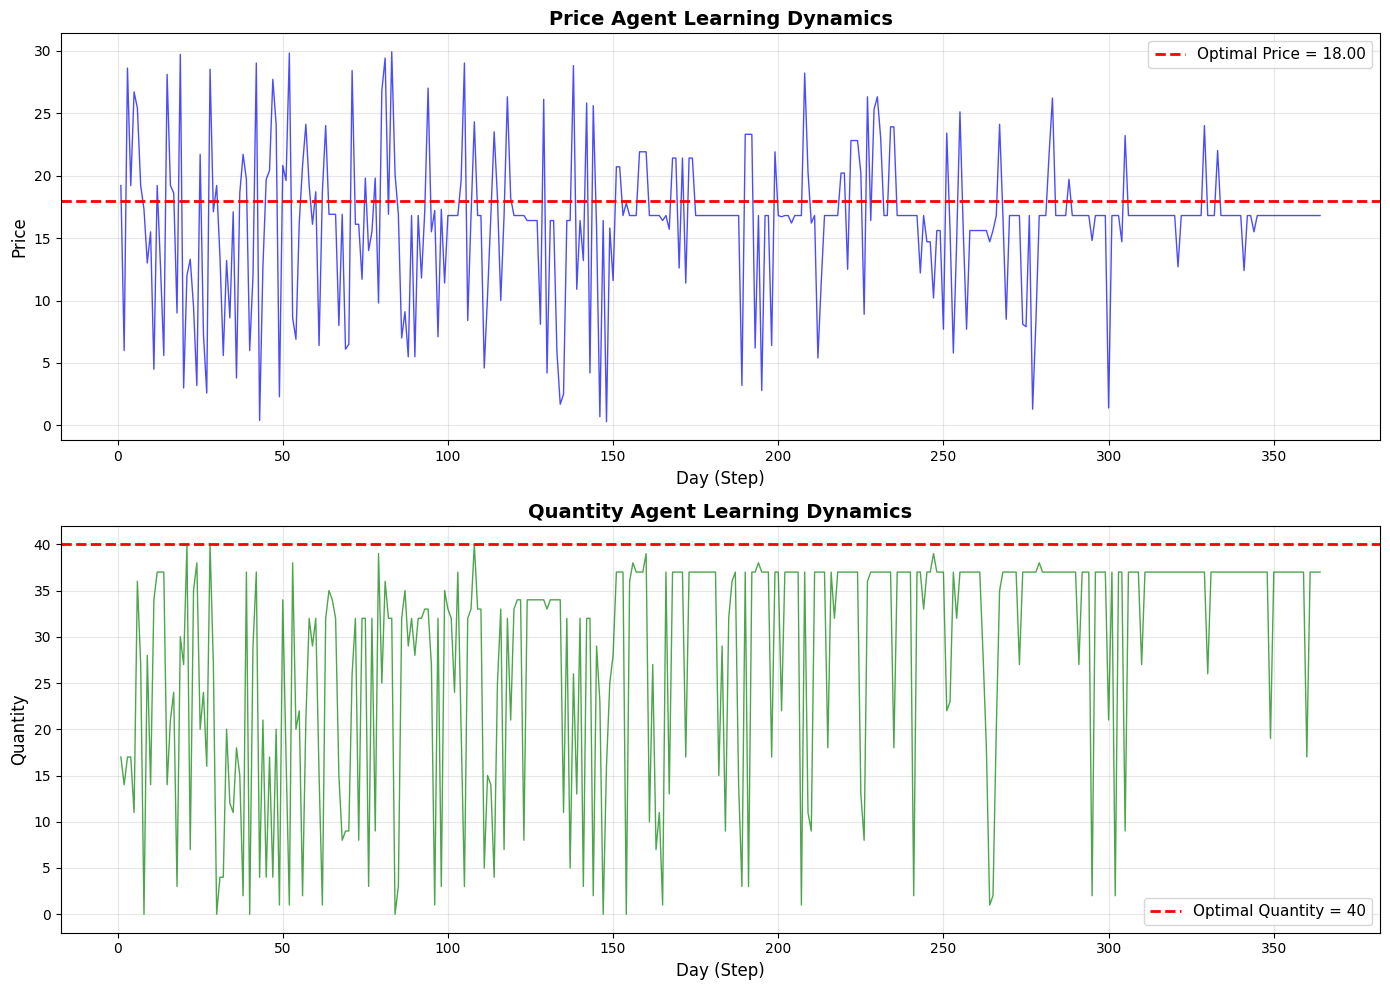

In [20]:
# Plot 1: Price and Quantity Convergence
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Price convergence
ax1.plot(combined_df['Step'], combined_df['Price'], color='blue', alpha=0.7, linewidth=1)
ax1.axhline(params.P_OPT, color='red', linestyle='--', linewidth=2, label=f'Optimal Price = {params.P_OPT:.2f}')
ax1.set_xlabel('Day (Step)', fontsize=12)
ax1.set_ylabel('Price', fontsize=12)
ax1.set_title('Price Agent Learning Dynamics', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Quantity convergence
ax2.plot(combined_df['Step'], combined_df['Quantity'], color='green', alpha=0.7, linewidth=1)
ax2.axhline(params.Q_OPT, color='red', linestyle='--', linewidth=2, label=f'Optimal Quantity = {params.Q_OPT}')
ax2.set_xlabel('Day (Step)', fontsize=12)
ax2.set_ylabel('Quantity', fontsize=12)
ax2.set_title('Quantity Agent Learning Dynamics', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


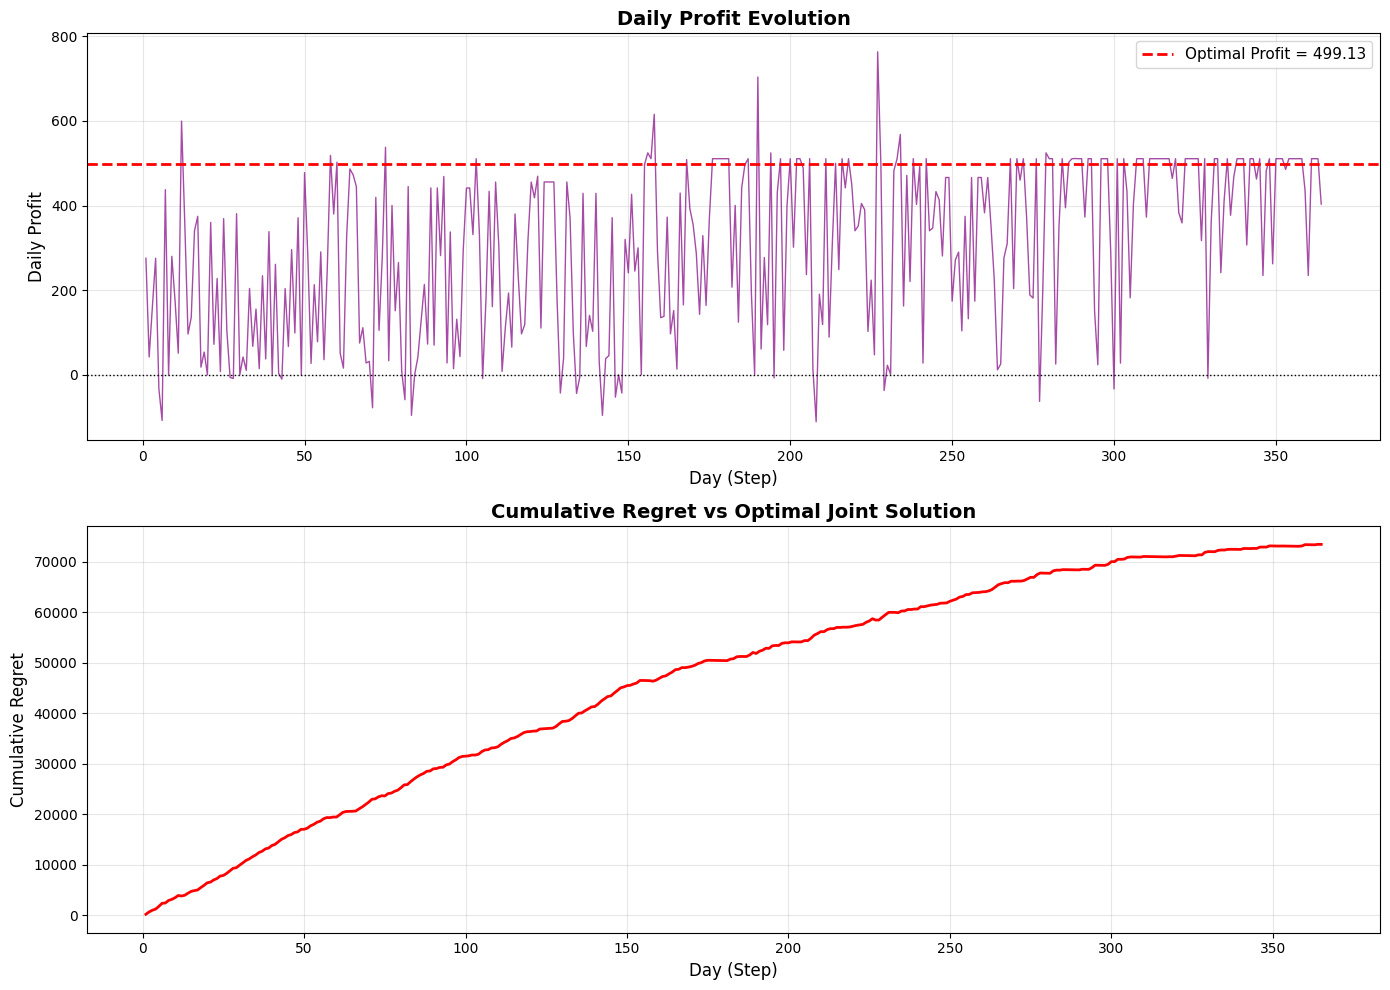


Final Statistics:
  Total cumulative profit: 108718.12
  Total cumulative regret: 73462.51
  Average profit per day: 297.86
  Optimal average profit: 499.13
  Learning efficiency: 59.7%


In [22]:
# Plot 2: Daily Profit and Cumulative Regret
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Daily profit
ax1.plot(combined_df['Step'], combined_df['Reward'], color='purple', alpha=0.7, linewidth=1)
ax1.axhline(params.PROFIT_OPT, color='red', linestyle='--', linewidth=2, label=f'Optimal Profit = {params.PROFIT_OPT:.2f}')
ax1.axhline(0, color='black', linewidth=1, linestyle=':')
ax1.set_xlabel('Day (Step)', fontsize=12)
ax1.set_ylabel('Daily Profit', fontsize=12)
ax1.set_title('Daily Profit Evolution', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Cumulative regret
price_agent_data = df[df["AgentID"] == 1].copy()
ax2.plot(price_agent_data['Step'].values, price_agent_data['Cummulative Regret'].values, 
         color='red', linewidth=2)
ax2.set_xlabel('Day (Step)', fontsize=12)
ax2.set_ylabel('Cumulative Regret', fontsize=12)
ax2.set_title('Cumulative Regret vs Optimal Joint Solution', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal Statistics:")
print(f"  Total cumulative profit: {model.agents[0].reward_cum:.2f}")
print(f"  Total cumulative regret: {model.agents[0].regret_cum:.2f}")
print(f"  Average profit per day: {model.agents[0].reward_cum / params.ROUNDS:.2f}")
print(f"  Optimal average profit: {params.PROFIT_OPT:.2f}")
print(f"  Learning efficiency: {(model.agents[0].reward_cum / params.ROUNDS) / params.PROFIT_OPT * 100:.1f}%")


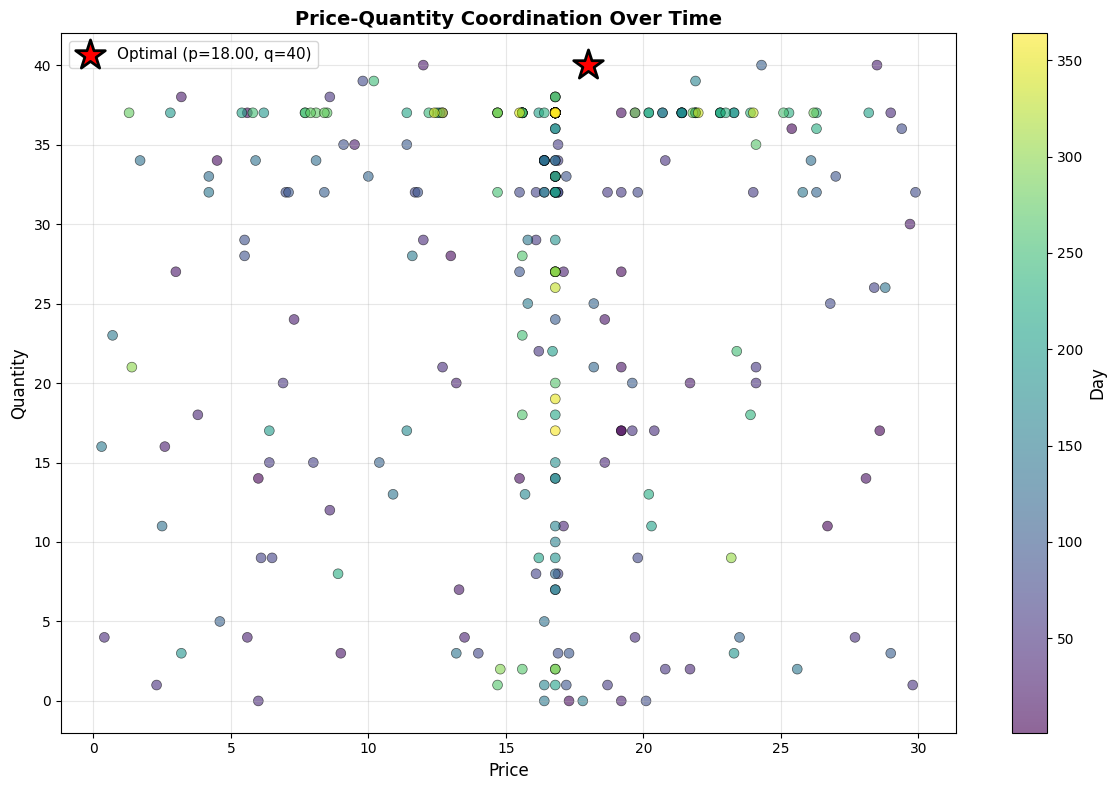


Coordination Analysis:
  Final 50 days average price: 16.85
  Final 50 days average quantity: 36.02
  Distance from optimal: p_error=1.15, q_error=3.98


In [23]:
# Plot 3: Price-Quantity Coordination (Scatter with time color)
fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(combined_df['Price'], combined_df['Quantity'], 
                     c=combined_df['Step'], cmap='viridis', 
                     alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Mark optimal point
ax.scatter([params.P_OPT], [params.Q_OPT], color='red', s=500, 
           marker='*', edgecolors='black', linewidth=2, 
           label=f'Optimal (p={params.P_OPT:.2f}, q={params.Q_OPT})', zorder=5)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Day', fontsize=12)

ax.set_xlabel('Price', fontsize=12)
ax.set_ylabel('Quantity', fontsize=12)
ax.set_title('Price-Quantity Coordination Over Time', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nCoordination Analysis:")
print(f"  Final 50 days average price: {combined_df['Price'].tail(50).mean():.2f}")
print(f"  Final 50 days average quantity: {combined_df['Quantity'].tail(50).mean():.2f}")
print(f"  Distance from optimal: p_error={abs(combined_df['Price'].tail(50).mean() - params.P_OPT):.2f}, q_error={abs(combined_df['Quantity'].tail(50).mean() - params.Q_OPT):.2f}")
